# [Bitcoin Price Prediction - Group 10]

## Group Members:

Müge Yeğin

Selin Ceydeli

Berk Meriç Alkan

Yiğit Tekelioğlu


## Introduction

This project aims to manipulate data on Bitcoin to analyze the features causing the fluctuations in the price of Bitcoin. After visualizing the opening, closing, high, and low price trends and observing the effects of the features on the changes in the Bitcoin prices, we will develop a machine learning model by which we are aiming to predict Bitcoin's future value and its movement. 

### **Visualizations Descriptive Statistics**

## Exploratory Data Analysis

### Utilized Datasets

#### 1) Main Dataset

The main dataset that we will be using in this project is a Kaggle dataset named "BTC-USD", which can be accessed from the following link: [Drive](https://drive.google.com/file/d/1FeJfOmeCYIHjm_Zw6pubewVfuJXh-coB/view?usp=sharing)

This dataset is a time-series-based dataset consisting 2755 observations recorded daily and 7 variables upon which the price trend of Bitcoin is examined. We will make use of the data on the opening, closing, high and low prices for the selected time range and volume, and analyze the price trends based on these relationships.

The main dataset of our project has the historical price information of Bitcoin over the last 8 years.

Date : Date of observation

Open : Opening price on the given day

High : Highest price on the given day

Low : Lowest price on the given day

Close : Closing price on the given day

Volume : Volume of transactions on the given day

```
# This cell imports required libraries and features for data science. The libraries are numpy, pandas, and matplotlib.
# Also, this cell imports our main dataset to the system.
```

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path_prefix = "./drive/My Drive"

from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename = "BTC-USD.csv" #Our main dataset
join(path_prefix, filename)
df = pd.read_csv(join(path_prefix, filename))
df.head()

Mounted at /content/drive


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2.755000e+03
mean,11768.664114,12082.896368,11425.227294,11783.725409,11783.725409,1.489443e+10
std,16405.233671,16841.443821,15910.212812,16413.271203,16413.271203,1.994140e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,609.777497,612.311005,606.981994,609.804504,609.804504,8.172330e+07
50%,6380.379883,6504.649902,6297.930176,6385.819824,6385.819824,5.262698e+09
75%,10795.780762,11047.681152,10485.476074,10788.915528,10788.915528,2.512467e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2755 non-null   object 
 1   Open       2755 non-null   float64
 2   High       2755 non-null   float64
 3   Low        2755 non-null   float64
 4   Close      2755 non-null   float64
 5   Adj Close  2755 non-null   float64
 6   Volume     2755 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 150.8+ KB


In [ ]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
df.shape 

(2755, 7)

In [ ]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Utilized Datasets

#### 2) Complementary Dataset -Information of Bitcoin by Market Capitalization

The complimentary dataset that we will be using in this project is another Kaggle dataset named "BTC-USD-MarketCap," which can be accessed from the following link: [Drive](https://drive.google.com/file/d/17wlrNQZ6H6JxpSHGGdtgdAaXyeeJcCCp/view?usp=sharing)

This dataset is a time-series-based dataset consisting 2991 observations recorded daily and 10 variables upon which the price trend of Bitcoin is examined.

In the complementary dataset, price history is available on a daily basis from April 28, 2013. This dataset has the historical price information of Bitcoin by market capitalization.

Date : Date of observation

Open : Opening price on the given day

High : Highest price on the given day

Low : Lowest price on the given day

Close : Closing price on the given day

Volume : Volume of transactions on the given day

Market Cap : Market capitalization in USD


```
# This cell imports our complementary dataset to the system which presents the historical price information of Bitcoin by market capitalization.

```

In [ ]:
filename2 = "BTC-USD-MarketCap.csv" #Our complementary dataset
join(path_prefix, filename2)
df_2 = pd.read_csv(join(path_prefix, filename2))
df_2.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [ ]:
df_2.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [ ]:
df_2.dtypes

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

In [ ]:
df_2.shape

(2991, 10)

In [ ]:
df_2.isna().sum() 

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

### Utilized Datasets

#### 3) Third Dataset -Information of Bitcoin by Generated Coins and Block Size

The third dataset that we will be using in this project is named "bitcoin", which can be accessed from the following link: [Drive](https://drive.google.com/file/d/1wv1RjFsgV1PXggQyjhAunZvYmCNUNeWV/view?usp=sharing)

The extracted the dataset from Datahub. 

This dataset is a time-series-based dataset consisting 3605 observations recorded daily and 16 variables upon which the price trend of Bitcoin is examined. We will make use of the data on the price data for the selected time range and generated coins and block size, and analyze the price trends based on these relationships.

In this third dataset, price history is available on a daily basis from January 9, 2009. This dataset has the historical price information of Bitcoin by generated coins, block size, block count, and payment count. Of these features, we are going to use generated coints and block size in our price analysis. 

The main dataset of our project has the historical price information of Bitcoin over the last 13 years, starting from 2009.

```
# This cell imports our third dataset to the system which presents the historical price information of Bitcoin by market capitalization.

```


In [ ]:
filename3 = "bitcoin.csv" #Our third dataset
join(path_prefix, filename3)
df_3 = pd.read_csv(join(path_prefix, filename3))
df_3.head()

,date,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount
0,2009-01-09,NaN,NaN,0,NaN,NaN,NaN,700.0,0.0,14,1.0,NaN,NaN,NaN,3010,14
1,2009-01-10,NaN,NaN,0,NaN,NaN,NaN,3050.0,0.0,61,1.0,NaN,NaN,NaN,13129,61
2,2009-01-11,NaN,NaN,0,NaN,NaN,NaN,4650.0,0.0,93,1.0,NaN,NaN,NaN,20033,93
3,2009-01-12,NaN,NaN,7,NaN,NaN,NaN,4700.0,0.0,102,1.0,5.0,NaN,0.0,22031,94
4,2009-01-13,NaN,NaN,0,NaN,NaN,NaN,6150.0,0.0,123,1.0,NaN,NaN,NaN,26527,123


In [ ]:
df_3.describe()

,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount
count,2.035000e+03,2.035000e+03,3605.000000,2.035000e+03,2035.000000,2.035000e+03,3605.000000,3605.000000,3.605000e+03,3.605000e+03,3.351000e+03,2035.000000,3351.000000,3.605000e+03,3605.000000
mean,2.735073e+09,1.139493e+09,99431.565326,3.771208e+10,2279.330865,1.434180e+09,4823.539125,51.504402,2.515554e+05,5.532081e+11,1.806366e+05,177.112048,0.000489,5.346078e+07,152.877115
std,5.160649e+09,1.970668e+09,104559.375595,5.861474e+10,3442.946652,3.035095e+09,2817.834929,107.765355,2.855449e+05,1.485977e+12,1.806980e+05,342.486667,0.006475,5.583618e+07,37.558325
min,3.287234e+07,2.053871e+07,0.000000,7.794864e+08,68.500000,0.000000e+00,200.000000,0.000000,4.000000e+00,1.000000e+00,0.000000e+00,0.024145,0.000000,8.600000e+02,4.000000
25%,2.523401e+08,1.027608e+08,5183.000000,4.380106e+09,320.220000,1.866320e+07,2412.500000,3.911432,1.198300e+04,1.090716e+06,1.008550e+04,51.360193,0.000000,2.274111e+06,138.000000
50%,7.898199e+08,2.824168e+08,59615.000000,8.121197e+09,596.330000,5.785860e+07,4049.997500,17.442879,1.329290e+05,9.083509e+08,1.313040e+05,76.016323,0.000100,3.072236e+07,153.000000
75%,3.428363e+09,1.557028e+09,194607.000000,4.237367e+10,2575.190000,1.180765e+09,6850.000000,43.215072,4.845470e+05,1.960614e+11,3.342495e+05,192.290392,0.000369,1.082456e+08,168.000000
max,4.835307e+10,1.624809e+10,490459.000000,3.261873e+11,19475.800000,2.384090e+10,34600.000000,1495.946477,1.283929e+06,7.454969e+12,1.883744e+06,4176.310572,0.220000,2.040237e+08,692.000000


In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   3605 non-null   object 
 1   txVolume(USD)          2035 non-null   float64
 2   adjustedTxVolume(USD)  2035 non-null   float64
 3   txCount                3605 non-null   int64  
 4   marketcap(USD)         2035 non-null   float64
 5   price(USD)             2035 non-null   float64
 6   exchangeVolume(USD)    2035 non-null   float64
 7   generatedCoins         3605 non-null   float64
 8   fees                   3605 non-null   float64
 9   activeAddresses        3605 non-null   int64  
 10  averageDifficulty      3605 non-null   float64
 11  paymentCount           3351 non-null   float64
 12  medianTxValue(USD)     2035 non-null   float64
 13  medianFee              3351 non-null   float64
 14  blockSize              3605 non-null   int64  
 15  bloc

In [ ]:
df_3.dtypes

date                      object
txVolume(USD)            float64
adjustedTxVolume(USD)    float64
txCount                    int64
marketcap(USD)           float64
price(USD)               float64
exchangeVolume(USD)      float64
generatedCoins           float64
fees                     float64
activeAddresses            int64
averageDifficulty        float64
paymentCount             float64
medianTxValue(USD)       float64
medianFee                float64
blockSize                  int64
blockCount                 int64
dtype: object

In [ ]:
df_3.shape

(3605, 16)

In [ ]:
df_3.isna().sum()

date                        0
txVolume(USD)            1570
adjustedTxVolume(USD)    1570
txCount                     0
marketcap(USD)           1570
price(USD)               1570
exchangeVolume(USD)      1570
generatedCoins              0
fees                        0
activeAddresses             0
averageDifficulty           0
paymentCount              254
medianTxValue(USD)       1570
medianFee                 254
blockSize                   0
blockCount                  0
dtype: int64

In [ ]:
df_3.dropna()

,date,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount
1570,2013-04-28,6.879868e+07,3.153714e+07,41702,1.500656e+09,135.30,0.000000e+00,4425.0000,32.791942,117984,8.974296e+06,130171.0,49.980091,0.000500,21597536,177
1571,2013-04-29,1.138128e+08,4.821652e+07,51602,1.491703e+09,134.44,0.000000e+00,4349.9988,45.724114,86925,8.974296e+06,112426.0,62.425891,0.000500,25676453,174
1572,2013-04-30,8.426632e+07,5.686790e+07,47450,1.598310e+09,144.00,0.000000e+00,3725.0000,45.748651,76871,9.854414e+06,98258.0,26.942145,0.000500,27042465,149
1573,2013-05-01,1.206825e+08,8.208736e+07,55176,1.543334e+09,139.00,0.000000e+00,3775.0000,40.885938,83564,1.007629e+07,96129.0,38.671980,0.000500,25727393,151
1574,2013-05-02,9.337533e+07,5.823736e+07,55295,1.292577e+09,116.38,0.000000e+00,3350.0000,52.554004,81920,1.007629e+07,101721.0,35.382348,0.000500,26388234,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3600,2018-11-18,1.976557e+09,1.304067e+09,239680,9.664468e+10,5559.74,4.159680e+09,1537.5000,18.037467,549212,6.653303e+12,301260.0,78.226098,0.000031,117375788,123
3601,2018-11-19,4.480410e+09,2.620049e+09,267845,9.771459e+10,5620.78,7.039560e+09,1575.0000,39.969486,674503,6.653303e+12,361918.0,151.592437,0.000076,138689706,126
3602,2018-11-20,5.838062e+09,3.944652e+09,288318,8.456520e+10,4863.93,8.428290e+09,1650.0000,69.367650,768696,6.653303e+12,423180.0,260.945272,0.000117,158893720,132
3603,2018-11-21,3.406311e+09,2.220358e+09,254837,7.764452e+10,4465.54,6.120120e+09,1312.5000,49.950160,628177,6.653303e+12,367256.0,161.673715,0.000101,127422353,105


```
# The histograms below indicate the frequency distributions of the four types of price variables (i.e. high, low, open, and close) taken from our main dataset "BTC-USD."

```

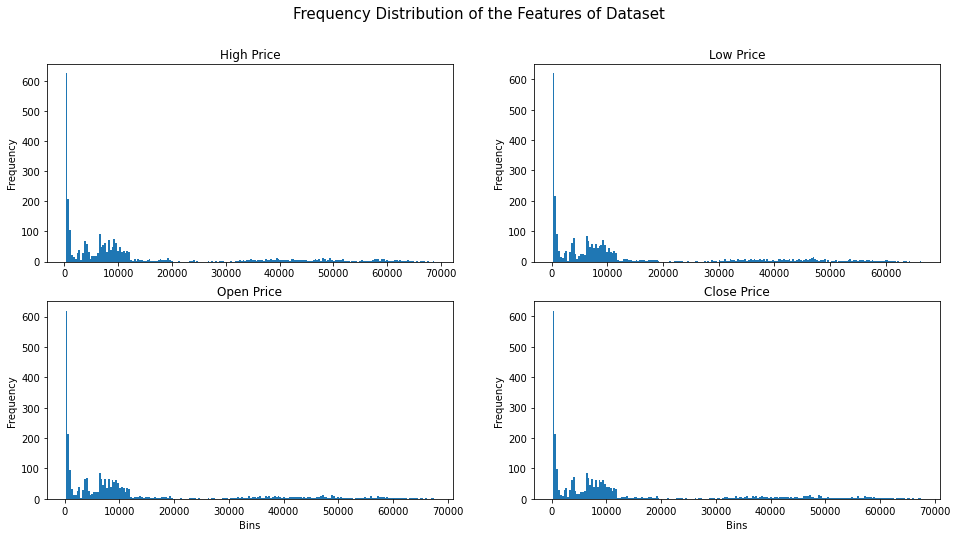

In [ ]:
highPrice = df["High"]
lowPrice = df["Low"]
openPrice = df["Open"]
closePrice = df["Close"]

n_bins = 200

fig, ax = plt.subplots(2, 2, figsize=(16, 8))
fig.suptitle('Frequency Distribution of the Features of Dataset', fontsize=15)

ax[0][0].hist(highPrice, n_bins)
ax[0][0].set_title("High Price")
ax[0][0].set_ylabel('Frequency')

ax[0][1].hist(lowPrice, n_bins)
ax[0][1].set_title("Low Price")
ax[0][1].set_ylabel('Frequency')

ax[1][0].hist(openPrice, n_bins)
ax[1][0].set_title("Open Price")
ax[1][0].set_ylabel('Frequency')
ax[1][0].set_xlabel('Bins')

ax[1][1].hist(closePrice, n_bins)
ax[1][1].set_title("Close Price")
ax[1][1].set_ylabel('Frequency')
ax[1][1].set_xlabel('Bins')

plt.show()

```
# The line graphs below are drawn for the comparison of the opening and closing prices of Bitcoin for the selected time range.
# The data are taken from our main dataset "BTC-USD."

```

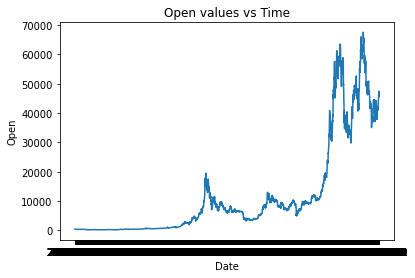

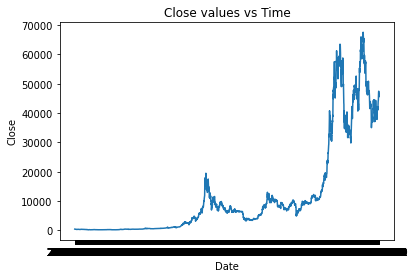

In [ ]:
df.columns
x = list(df["Date"])
y = list(df["Open"])
plt.plot(x, y)
plt.title('Open values vs Time')
plt.xlabel('Date')
plt.ylabel('Open')
plt.show()
x = list(df["Date"])
y = list(df["Close"])
plt.plot(x, y)
plt.title('Close values vs Time')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

```
# The scatter plots below display the relationship between the price variables (i.e. open, close, high, and low) and volume. 
# The data are taken from our main dataset "BTC-USD."
```

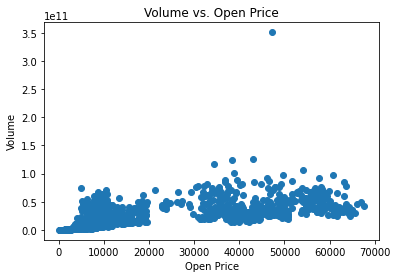

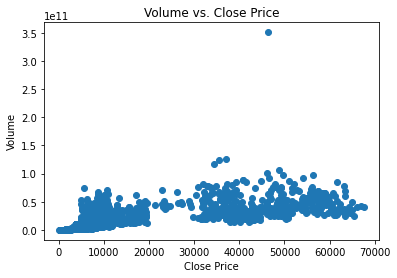

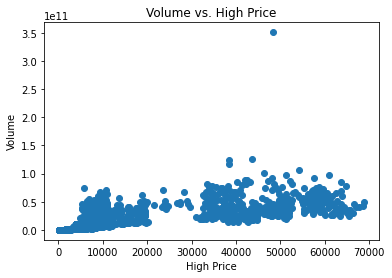

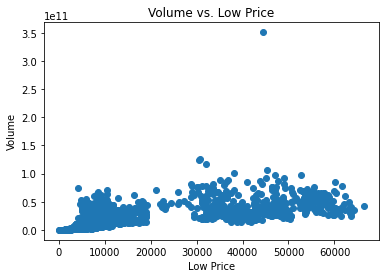

In [ ]:
volume_df = df["Volume"]

open_df = df["Open"]
close_df = df["Close"]
low_df = df["Low"]
high_df = df["High"]

plt.scatter(open_df, volume_df)
plt.ylabel("Volume")
plt.xlabel("Open Price")
plt.title("Volume vs. Open Price")
plt.show()

plt.scatter(close_df, volume_df)
plt.ylabel("Volume")
plt.xlabel("Close Price")
plt.title("Volume vs. Close Price")
plt.show()

plt.scatter(high_df, volume_df)
plt.ylabel("Volume")
plt.xlabel("High Price")
plt.title("Volume vs. High Price")
plt.show()

plt.scatter(low_df, volume_df)
plt.ylabel("Volume")
plt.xlabel("Low Price")
plt.title("Volume vs. Low Price")
plt.show()

```
# The scatter plots below display the linear relationship between the price variables (i.e. open, close, high, and low) and marketcap. 
# The data are taken from our complementary dataset "BTC-USD-MarketCap."
```

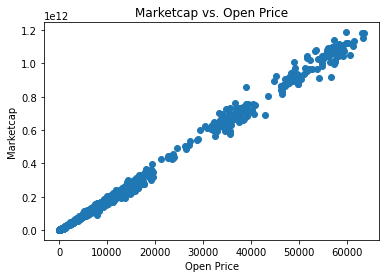

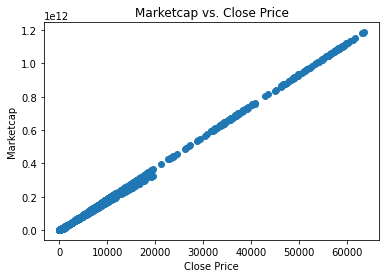

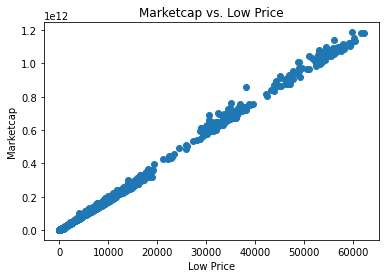

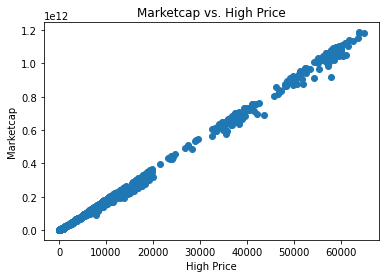

In [ ]:
marketcap_df = df_2["Marketcap"]

open_df = df_2["Open"]
close_df = df_2["Close"]
low_df = df_2["Low"]
high_df = df_2["High"]

plt.scatter(open_df, marketcap_df)
plt.ylabel("Marketcap")
plt.xlabel("Open Price")
plt.title("Marketcap vs. Open Price")
plt.show()

plt.scatter(close_df, marketcap_df)
plt.ylabel("Marketcap")
plt.xlabel("Close Price")
plt.title("Marketcap vs. Close Price")
plt.show()

plt.scatter(low_df, marketcap_df)
plt.ylabel("Marketcap")
plt.xlabel("Low Price")
plt.title("Marketcap vs. Low Price")
plt.show()

plt.scatter(high_df, marketcap_df)
plt.ylabel("Marketcap")
plt.xlabel("High Price")
plt.title("Marketcap vs. High Price")
plt.show()

```
# The heat map represents the correlation between the prices and volume variables. 
# The positive values on the matrix below indicate a positive correlation and the magnitude of the values represents the strength of the correlation. 
```

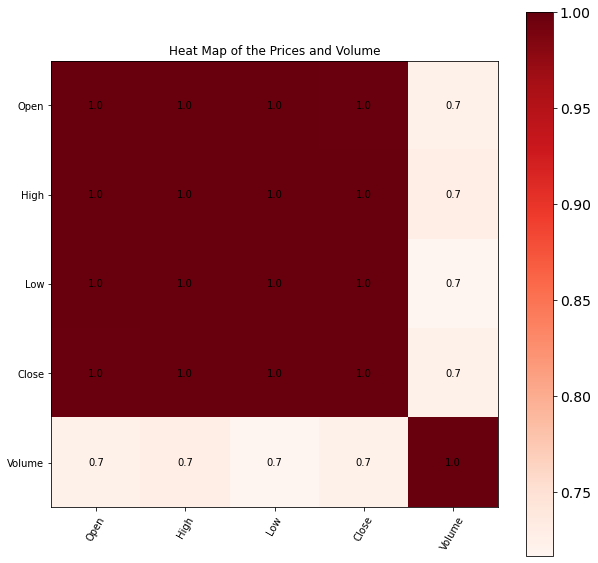

In [ ]:
corr = df.drop(["Date","Adj Close"],axis=1).corr()
corr_vals = corr.values
fig = plt.figure(figsize=(10, 10))
plt.imshow(corr_vals,cmap="Reds")

corr2 = corr.select_dtypes(['number'])
plt.yticks(range(len(corr2.columns)),corr2.columns)
plt.xticks(range(len(corr2.columns)),corr2.columns,rotation=60)

for i in range(len(corr_vals)):
  for j in range(len(corr_vals)):
    text = plt.text(j , i , round(corr_vals[i, j],1), horizontalalignment='center', verticalalignment='center', color = "black")

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title("Heat Map of the Prices and Volume")
plt.show()

```
# The scatter plots below display the linear relationship between the price variable and block size. 
# The data are taken from our third dataset "bitcoin."
```

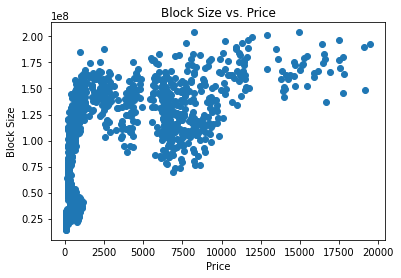

In [ ]:
price_df = df_3["price(USD)"]

blockSize_df = df_3["blockSize"]

plt.scatter(price_df, blockSize_df)
plt.ylabel("Block Size")
plt.xlabel("Price")
plt.title("Block Size vs. Price")
plt.show()

```
# The scatter plots below display the linear relationship between the price variable and generated coins. 
# The data are taken from our third dataset "bitcoin."
```

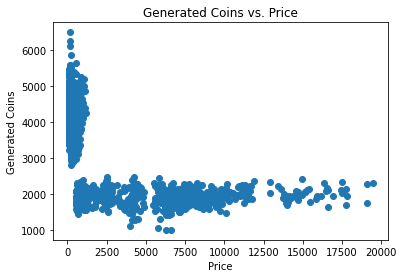

In [ ]:
price_df = df_3["price(USD)"]

generatedCoins_df = df_3["generatedCoins"]

plt.scatter(price_df, generatedCoins_df)
plt.ylabel("Generated Coins")
plt.xlabel("Price")
plt.title("Generated Coins vs. Price")
plt.show()

## Hypothesis Testing


In this part of the project, we will investigate the difference between the means of high, low, open, and close prices of different samples with respect the mean values of volume and marketcap as found in the Exploratory Data Analysis section of this report. 

To put it more explicitly, we will compare the means of high, low, open, and close prices of the bitcoins with a volume greater than 1.489443e+10 and with a volume less than or equal to 1.489443e+10, which corresponds to the mean of the values in the marketcap column in the df_1 "BTC-USD.csv" data set.

We will make the same comparison with respect to marketcap, selecting the comparison value as 1.208761e+11, which corresponds to the mean of the values in the marketcap column in the df_2 "BTC-USD-MarketCap.csv" data set.

Since we are investigating the difference between the means of high, low, open, and close prices with respect to means of two different features, i.e. volume and marketcap, we have formed two sets of null and alternative hypothesis. 


Hypotheses for the high price-low price analysis with respect to volume:

Null Hypothesis ( 𝐻0 ): Means of the two samples which are the price values of the bitcoins with a volume greater than 1.489443e+10 and price values of the bitcoins with a volume less than or equal to 1.489443e+10 are equal. 

Alternative Hypothesis ( 𝐻𝐴 ): Means of the two samples which are the price values of the bitcoins with a volume greater than 1.489443e+10 and price values of the bitcoins with a volume less than or equal to 1.489443e+10 are not equal.


Hypotheses for the high price-low price analysis with respect to marketcap:

Null Hypothesis ( 𝐻0 ): Means of the two samples which are the price values of the bitcoins with a marketcap greater than 1.208761e+11 and price values of the bitcoins with a marketcap less than or equal to 1.208761e+11 are equal. 

Alternative Hypothesis ( 𝐻𝐴 ): Means of the two samples which are the price values of the bitcoins with a marketcap greater than 1.208761e+11 and price values of the bitcoins with a marketcap less than or equal to 1.208761e+11 are not equal. 

Now, let's check if there is any significant difference between the means of the bitcoins who have a volume greater than 1.489443e+10 and those who do not.
For this exercise, our focus is on opening price of Bitcoin.

In [ ]:
import seaborn as sns #For data visualization 

In [ ]:
filename = "BTC-USD.csv"

df_mean = pd.read_csv(join(path_prefix, filename))

In [ ]:
df_mean.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


mean score of bitcoin open prices while volume greater than 1.489443e+10: 25848.14
mean score of bitcoin open prices while volume less than 1.489443e+10: 3098.02
 


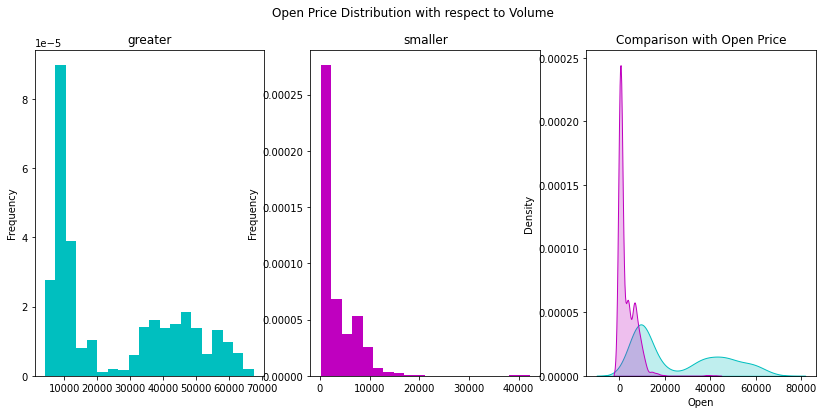

In [ ]:
test_type2 = "Open"
Greater2 = df[df["Volume"] >= 1.489443e+10][test_type2]
Less2 = df[df["Volume"] <= 1.489443e+10][test_type2] 

fig, ax = plt.subplots(1, 3, figsize=(14,6))  

print(f"mean score of bitcoin open prices while volume greater than 1.489443e+10: {Greater2.mean():.2f}")
print(f"mean score of bitcoin open prices while volume less than 1.489443e+10: {Less2.mean():.2f}")
print(" ")

Greater2.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="c", density=True)
ax[0].set_title("greater")

Less2.plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
ax[1].set_title("smaller")

sns.kdeplot(Greater2, shade=True, label="greater volume", ax=ax[2], color="c")
sns.kdeplot(Less2, shade=True, label="less volume", ax=ax[2], color="m")
ax[2].set_title("Comparison with Open Price")

plt.suptitle("Open Price Distribution with respect to Volume")
plt.show()

By looking at the above graphs, we can conclude that the bitcoins with a volume greater than 1.489443e+10 have higher opening price values on average compared to the bitcoins with a lower volume but we should show this difference numerically by conducting hypothesis testing. 




Now, let's show this difference statistically by applying a significance test. Since we have two different distributions for the opening price, we used the independence two-sample (unpaired) T-test.
The significance level, α , is the probability of rejecting the null hypothesis when it is true. We took our significance values as 0.1 so at the end of our code, we can say that we can predict this printed code by 90% likelihood.

In [ ]:
print("Hypothesis Testing for the Open Price:")

from scipy import stats
import scipy.stats as sp

alpha = 0.1
degree = len(Greater2)-1

t_stat = stats.t.ppf(1-alpha, degree)
#print(t_stat)
value = stats.ttest_ind(Greater2, Less2, equal_var=False).statistic
#print(value)
if t_stat < value:
  print("Null hypothesis is rejected.")
else:
  print("We fail to reject null hypothesis. ")

Hypothesis Testing for the Open Price:
Null hypothesis is rejected.


The printed code is "Null hypothesis is rejected." The null hypothesis is rejected with a probability of 90% and the difference in the means of our two samples taken from the dataset is significant. In other words, the means of the two samples which are the opening price values of the bitcoins with a volume greater than 1.489443e+10 and price values of the bitcoins with a volume less than or equal to 1.489443e+10 are not equal.

Now, let's check if there is any significant difference between the means of the bitcoins who have a marketcap greater than 1.208761e+11 and those who do not. For this exercise, our focus is on the opening prices of Bitcoin.

In [ ]:
filename2 = "BTC-USD-MarketCap.csv"

df2_mean = pd.read_csv(join(path_prefix, filename2))

In [ ]:
df2_mean.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [ ]:
df2_mean.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


mean score of bitcoin open prices while Marketcap greater than 1.208761e+11: 16961.99
mean score of bitcoin open prices while Marketcap less than 1.208761e+11: 1592.35
 


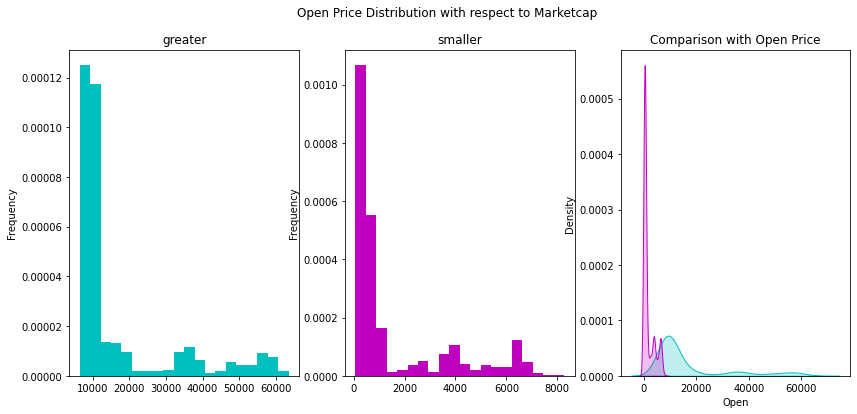

In [ ]:
test_type2 = "Open"
Greater2 = df_2[df_2["Marketcap"] >= 1.208761e+11][test_type2]
Less2 = df_2[df_2["Marketcap"] <= 1.208761e+11][test_type2] 

fig, ax = plt.subplots(1, 3, figsize=(14,6))  

print(f"mean score of bitcoin open prices while Marketcap greater than 1.208761e+11: {Greater2.mean():.2f}")
print(f"mean score of bitcoin open prices while Marketcap less than 1.208761e+11: {Less2.mean():.2f}")
print(" ")

Greater2.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="c", density=True)
ax[0].set_title("greater")

Less2.plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
ax[1].set_title("smaller")

sns.kdeplot(Greater2, shade=True, label="greater Marketcap", ax=ax[2], color="c")
sns.kdeplot(Less2, shade=True, label="less Marketcap", ax=ax[2], color="m")
ax[2].set_title("Comparison with Open Price")

plt.suptitle("Open Price Distribution with respect to Marketcap")
plt.show()


By looking at the graphs above, we can conclude that the bitcoins with a MarketCap greater than 1.208761e+11 have higher openning price values on average compared to the bitcoins with a lower MarketCap. Again, we should conduct a second hypothesis testing for the Marketcap to support our observation with numerical values.


Now, let's show this difference statistically by applying a significance test. Since we have two different distributions for openning price, we used the independence two-sample (unpaired) T-test. The significance level, α , is the probability of rejecting the null hypothesis when it is true. We took our significance values as 0.1 so at the end of our code, we can say that we can predict this printed code by 90% likelihood.


In [ ]:
print("Hypothesis Testing for the Open Price:")

from scipy import stats
import scipy.stats as sp

alpha = 0.1
degree = len(Greater2)-1

t_stat = stats.t.ppf(1-alpha, degree)
#print(t_stat)
value = stats.ttest_ind(Greater2, Less2, equal_var=False).statistic
#print(value)
if t_stat < value:
  print("Null hypothesis is rejected.")
else:
  print("We fail to reject null hypothesis. ")

Hypothesis Testing for the Open Price:
Null hypothesis is rejected.


The printed code is "Null hypothesis is rejected." The null hypothesis is rejected with a probability of 90% and the difference in the means of our two samples taken from the dataset is significant. In other words,the means of the two samples which are the price values of the bitcoins with a MarketCap greater than 1.208761e+11 and price values of the bitcoins with a MarketCap less than or equal to 1.208761e+11 are not equal.

Now, we will investigate whether there is a significant statistical difference between high and low prices with respect to open and close prices of the same day. 

Hypotheses for the high price-low price analysis with respect to open price:

Null Hypothesis ( 𝐻0 ): The difference between high and low prices of the bitcoins with respect to opening prices of the same day is equal to zero. 

Alternative Hypothesis ( 𝐻𝐴 ): There is a significant statistical difference between high and low prices with respect to opening prices of the same day. 


mean score of bitcoin high prices with respect to open prices: 12082.90
mean score of bitcoin low prices with respect to open prices: 11425.23
 


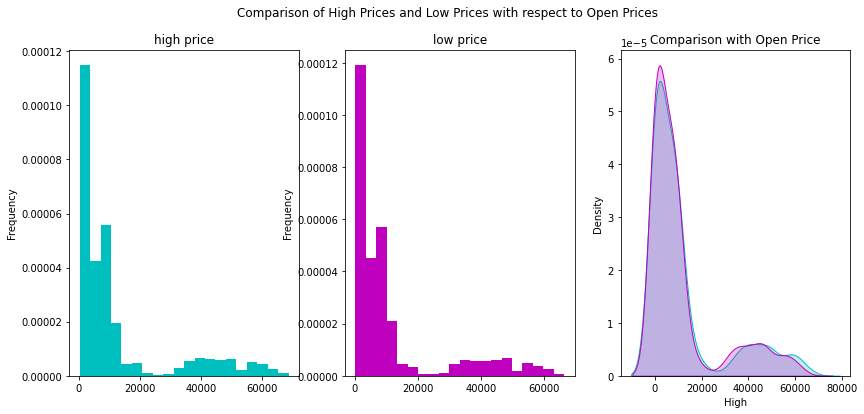

In [ ]:
HighPrice = df[df["Open"] > 0]["High"]
LowPrice = df[df["Open"] > 0]["Low"] 

fig, ax = plt.subplots(1, 3, figsize=(14,6))  

print(f"mean score of bitcoin high prices with respect to open prices: {HighPrice.mean():.2f}")
print(f"mean score of bitcoin low prices with respect to open prices: {LowPrice.mean():.2f}")
print(" ")

HighPrice.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="c", density=True)
ax[0].set_title("high price")

LowPrice.plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
ax[1].set_title("low price")

sns.kdeplot(HighPrice, shade=True, label="high price", ax=ax[2], color="c")
sns.kdeplot(LowPrice, shade=True, label="low price", ax=ax[2], color="m")
ax[2].set_title("Comparison with Open Price")

plt.suptitle("Comparison of High Prices and Low Prices with respect to Open Prices")
plt.show()


By looking at the graphs above, we cannot make a certain conclusion about the difference between the high and low prices with respect to the opening prices of the same day because even though there is a slight difference between the comparison curves in the third graph as well as in the mean scores of high and low prices, we cannot be sure of the statistical significance of the difference without conducting hypothesis testing. 

Therefore, we should conduct a second hypothesis testing to support our observation with numerical values.

In [ ]:
print("Hypothesis Testing for the statistical difference between the high and low prices with respect to open price:")

from scipy import stats
import scipy.stats as sp

alpha = 0.1
degree = len(HighPrice)-1

t_stat = stats.t.ppf(1-alpha, degree)
#print(t_stat)
value = stats.ttest_ind(HighPrice, LowPrice, equal_var=False).statistic
#print(value)
if t_stat < value:
  print("Null hypothesis is rejected.")
else:
  print("We fail to reject null hypothesis. ")

Hypothesis Testing for the statistical difference between the high and low prices with respect to open price:
Null hypothesis is rejected.


The printed code is "Null hypothesis is rejected." The null hypothesis is rejected with a probability of 90% and the difference between the high and low prices with respect to open prices is significant.

Hypotheses for the high price-low price analysis with respect to close price:

Null Hypothesis ( 𝐻0 ): The difference between high and low prices of the bitcoins with respect to closing prices of the same day is equal to zero. 

Alternative Hypothesis ( 𝐻𝐴 ): There is a significant statistical difference between high and low prices with respect to closing prices of the same day. 

mean score of bitcoin high prices with respect to close prices: 12082.90
mean score of bitcoin low prices with respect to close prices: 11425.23
 


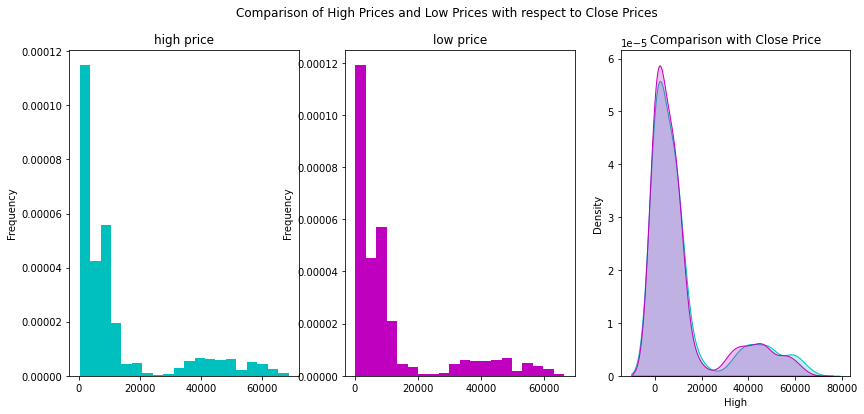

In [ ]:
HighPrice2 = df[df["Close"] > 0]["High"]
LowPrice2 = df[df["Close"] > 0]["Low"] 

fig, ax = plt.subplots(1, 3, figsize=(14,6))  

print(f"mean score of bitcoin high prices with respect to close prices: {HighPrice2.mean():.2f}")
print(f"mean score of bitcoin low prices with respect to close prices: {LowPrice2.mean():.2f}")
print(" ")

HighPrice2.plot(kind="hist", ax=ax[0], bins=20, label="completed", color="c", density=True)
ax[0].set_title("high price")

LowPrice2.plot(kind="hist", ax=ax[1], bins=20, label="none", color="m", density=True)
ax[1].set_title("low price")

sns.kdeplot(HighPrice, shade=True, label="high price", ax=ax[2], color="c")
sns.kdeplot(LowPrice, shade=True, label="low price", ax=ax[2], color="m")
ax[2].set_title("Comparison with Close Price")

plt.suptitle("Comparison of High Prices and Low Prices with respect to Close Prices")
plt.show()

By looking at the graphs above, we cannot make a certain conclusion about the difference between the high and low prices with respect to the close prices of the same day because even though there is a slight difference between the comparison curves in the third graph as well as in the mean scores of high and low prices, we cannot be sure of the statistical significance of the difference without conducting hypothesis testing. 

Therefore, we should conduct a second hypothesis testing to support our observation with numerical values.

In [ ]:
print("Hypothesis Testing for the statistical difference between the high and low prices with respect to close price:")

from scipy import stats
import scipy.stats as sp

alpha = 0.1
degree = len(HighPrice2)-1

t_stat = stats.t.ppf(1-alpha, degree)
#print(t_stat)
value = stats.ttest_ind(HighPrice2, LowPrice2, equal_var=False).statistic
#print(value)
if t_stat < value:
  print("Null hypothesis is rejected.")
else:
  print("We fail to reject null hypothesis. ")

Hypothesis Testing for the statistical difference between the high and low prices with respect to close price:
Null hypothesis is rejected.


The printed code is "Null hypothesis is rejected." The null hypothesis is rejected with a probability of 90% and the difference between the high and low prices with respect to close prices is significant.

## Machine Learning Models 

We aim to predict the price of Bitcoin by using various machine learning models. We will perform these machine learning algorithms on our main dataset, which is named as "BTC-USD.CSV."

In [ ]:
import seaborn as sns #For data visualization 
%matplotlib inline
sns.set_style("whitegrid")

import warnings 
warnings.filterwarnings("ignore")

In [ ]:
pd.isnull(df).sum() #For cleaning null values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Since we don't have any null values, as seen from above, we don't need to drop any values. 

## Prediction of Bitcoin Price with Various Machine Learning Models


In this part, we will check the correlations between "volume" and the four types of price variables (open, close, high, and low) in order to predict the future price of a bitcoin. 

In [ ]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999526,0.999121,0.998834,0.998834,0.724416
High,0.999526,1.000000,0.999051,0.999497,0.999497,0.728143
Low,0.999121,0.999051,1.000000,0.999391,0.999391,0.716700
Close,0.998834,0.999497,0.999391,1.000000,1.000000,0.723428
Adj Close,0.998834,0.999497,0.999391,1.000000,1.000000,0.723428
Volume,0.724416,0.728143,0.716700,0.723428,0.723428,1.000000


With the below code, we convert the rating values into binary values.

In [ ]:
df.High.describe()

count     2755.000000
mean     12082.896368
std      16841.443821
min        211.731003
25%        612.311005
50%       6504.649902
75%      11047.681152
max      68789.625000
Name: High, dtype: float64

After observing these results, we decided to define ratings above 11047.681152 (corresponds to 75th percentile) as high price whereas ratings below 11047.681152 (corresponds to 25th percentile) will be considered as low price. Using this model, we will encode high price as "1" and low price as "0".

In [ ]:
df.loc[df['High'] < 11047.681152, 'High'] = 0 
df.loc[df['High'] >= 11047.681152, 'High'] = 1
df.loc[df['High'] == 1 ]

,Date,Open,High,Low,Close,Adj Close,Volume
1169,2017-11-29,10077.400391,1.0,9601.030273,9888.610352,9888.610352,11568799744
1172,2017-12-02,10978.299805,1.0,10905.099609,11074.599609,11074.599609,5138500096
1173,2017-12-03,11082.700195,1.0,10862.000000,11323.200195,11323.200195,6608309760
1174,2017-12-04,11315.400391,1.0,11081.799805,11657.200195,11657.200195,6132409856
1175,2017-12-05,11685.700195,1.0,11604.599609,11916.700195,11916.700195,6895260160
...,...,...,...,...,...,...,...
2750,2022-03-29,47100.437500,1.0,47100.437500,47465.730469,47465.730469,31397059069
2751,2022-03-30,47456.898438,1.0,46746.210938,47062.664063,47062.664063,29333883962
2752,2022-03-31,47062.148438,1.0,45390.539063,45538.675781,45538.675781,33327427106
2753,2022-04-01,45554.164063,1.0,44403.140625,46281.644531,46281.644531,38162644287


In [ ]:
df.Low.describe()

count     2755.000000
mean     11425.227294
std      15910.212812
min        171.509995
25%        606.981994
50%       6297.930176
75%      10485.476074
max      66382.062500
Name: Low, dtype: float64

In [ ]:
df.loc[df['Low'] < 10485.476074, 'Low'] = 0 
df.loc[df['Low'] >= 10485.476074, 'Low'] = 1
df.loc[df['Low'] == 1 ]

,Date,Open,High,Low,Close,Adj Close,Volume
1172,2017-12-02,10978.299805,1.0,1.0,11074.599609,11074.599609,5138500096
1173,2017-12-03,11082.700195,1.0,1.0,11323.200195,11323.200195,6608309760
1174,2017-12-04,11315.400391,1.0,1.0,11657.200195,11657.200195,6132409856
1175,2017-12-05,11685.700195,1.0,1.0,11916.700195,11916.700195,6895260160
1176,2017-12-06,11923.400391,1.0,1.0,14291.500000,14291.500000,12656300032
...,...,...,...,...,...,...,...
2750,2022-03-29,47100.437500,1.0,1.0,47465.730469,47465.730469,31397059069
2751,2022-03-30,47456.898438,1.0,1.0,47062.664063,47062.664063,29333883962
2752,2022-03-31,47062.148438,1.0,1.0,45538.675781,45538.675781,33327427106
2753,2022-04-01,45554.164063,1.0,1.0,46281.644531,46281.644531,38162644287


In [ ]:
df.Open.describe()

count     2755.000000
mean     11768.664114
std      16405.233671
min        176.897003
25%        609.777497
50%       6380.379883
75%      10795.780762
max      67549.734375
Name: Open, dtype: float64

In [ ]:
df.loc[df['Open'] < 10795.780762, 'Open'] = 0 
df.loc[df['Open'] >= 10795.780762, 'Open'] = 1
df.loc[df['Open'] == 1 ]

,Date,Open,High,Low,Close,Adj Close,Volume
1172,2017-12-02,1.0,1.0,1.0,11074.599609,11074.599609,5138500096
1173,2017-12-03,1.0,1.0,1.0,11323.200195,11323.200195,6608309760
1174,2017-12-04,1.0,1.0,1.0,11657.200195,11657.200195,6132409856
1175,2017-12-05,1.0,1.0,1.0,11916.700195,11916.700195,6895260160
1176,2017-12-06,1.0,1.0,1.0,14291.500000,14291.500000,12656300032
...,...,...,...,...,...,...,...
2750,2022-03-29,1.0,1.0,1.0,47465.730469,47465.730469,31397059069
2751,2022-03-30,1.0,1.0,1.0,47062.664063,47062.664063,29333883962
2752,2022-03-31,1.0,1.0,1.0,45538.675781,45538.675781,33327427106
2753,2022-04-01,1.0,1.0,1.0,46281.644531,46281.644531,38162644287


In [ ]:
df.Close.describe()

count     2755.000000
mean     11783.725409
std      16413.271203
min        178.102997
25%        609.804504
50%       6385.819824
75%      10788.915528
max      67566.828125
Name: Close, dtype: float64

In [ ]:
df.loc[df['Close'] < 10788.915528, 'Close'] = 0 
df.loc[df['Close'] >= 10788.915528, 'Close'] = 1
df.loc[df['Close'] == 1 ]

,Date,Open,High,Low,Close,Adj Close,Volume
1171,2017-12-01,0.0,0.0,0.0,1.0,10975.599609,6783119872
1172,2017-12-02,1.0,1.0,1.0,1.0,11074.599609,5138500096
1173,2017-12-03,1.0,1.0,1.0,1.0,11323.200195,6608309760
1174,2017-12-04,1.0,1.0,1.0,1.0,11657.200195,6132409856
1175,2017-12-05,1.0,1.0,1.0,1.0,11916.700195,6895260160
...,...,...,...,...,...,...,...
2750,2022-03-29,1.0,1.0,1.0,1.0,47465.730469,31397059069
2751,2022-03-30,1.0,1.0,1.0,1.0,47062.664063,29333883962
2752,2022-03-31,1.0,1.0,1.0,1.0,45538.675781,33327427106
2753,2022-04-01,1.0,1.0,1.0,1.0,46281.644531,38162644287


In [ ]:
df_2.High.describe()

count     2991.000000
mean      6893.326038
std      11642.832456
min         74.561096
25%        436.179001
50%       2387.610107
75%       8733.926948
max      64863.098908
Name: High, dtype: float64

Ratio Between High Ratings and Low Ratings

0.0    2066
1.0     689
Name: Open, dtype: int64

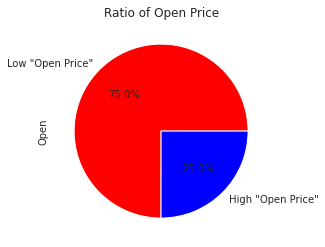

In [ ]:
df1 = df.copy()
ab = df1['Open'].value_counts()
my_label=['Low "Open Price"','High "Open Price"'] 
my_colors=['red','blue']
ax = ab.plot(kind='pie', labels=my_label, autopct='%1.1f%%', colors=my_colors)
ax.set_title('Ratio of Open Price')
ax.plot()
df.Open.value_counts()

0.0    2066
1.0     689
Name: Open, dtype: int64

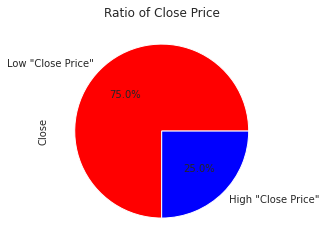

In [ ]:
df1 = df.copy()
ab = df1['Close'].value_counts()
my_label=['Low "Close Price"','High "Close Price"'] 
my_colors=['red','blue']
ax = ab.plot(kind='pie', labels=my_label, autopct='%1.1f%%', colors=my_colors)
ax.set_title('Ratio of Close Price')
ax.plot()
df.Open.value_counts()

0.0    2066
1.0     689
Name: Open, dtype: int64

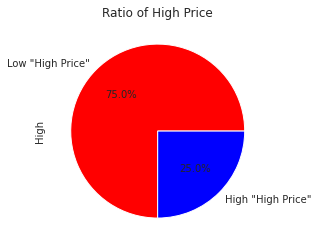

In [ ]:
df1 = df.copy()
ab = df1['High'].value_counts()
my_label=['Low "High Price"','High "High Price"'] 
my_colors=['red','blue']
ax = ab.plot(kind='pie', labels=my_label, autopct='%1.1f%%', colors=my_colors)
ax.set_title('Ratio of High Price')
ax.plot()
df.Open.value_counts()

0.0    2066
1.0     689
Name: Open, dtype: int64

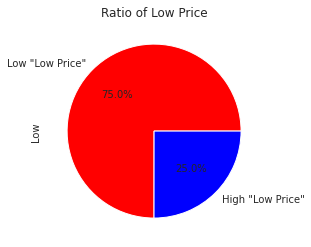

In [ ]:
df1 = df.copy()
ab = df1['Low'].value_counts()
my_label=['Low "Low Price"','High "Low Price"'] 
my_colors=['red','blue']
ax = ab.plot(kind='pie', labels=my_label, autopct='%1.1f%%', colors=my_colors)
ax.set_title('Ratio of Low Price')
ax.plot()
df.Open.value_counts()

As we can see from the pie chart, all four price types have exactly the same distribution of high and low prices.
Moreover, looking at the percentages, we can see that we have an imbalanced dataset. 

# Model Fitting and Predicting
For the model fitting and predicting part of our project, we will use 4 different models:
 
1. Logistic Regression

2. Random Forest Classifier

3. K-Nearest Neighbors Classifier





In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import train_test_split

We split the data we extracted from our main data set ("BTC-USD.csv") into train (60%), validation (20%) and test (20%). We will use train_test_split with random_state parameter set to 0. 

Before running the algorithms, we will drop the non-numeric columns. 

In [ ]:
X = df.drop(["Date","Open"],axis=1)
y = df["Open"]
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, random_state=0, test_size=0.40, stratify = y)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, random_state=0, test_size=0.50, stratify = y_remaining)

# 1. Logistic Regression
Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set.

In [ ]:
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_val)
LR_Accuracy = accuracy_score(y_val, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

LR_AUC = roc_auc_score(y_val, LR_Predict) 
print("AUC: " + str(LR_AUC))

Accuracy: 0.25045372050816694
AUC: 0.5


# 2. Random Forest Classifier
Random forests classifier is an ensemble learning method for classification, regression, and other tasks that operates by constructing a multitude of decision trees at training time.

In [ ]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_val)
RFC_Accuracy = accuracy_score(y_val, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_val, RFC_Predict) 
print("AUC: " + str(RFC_AUC))

Accuracy: 0.985480943738657
AUC: 0.9734270274063936


# 3. K-Nearest Neighbors Classifier
K-nearest neighbors classifier is a data classification algorithm that attempts to determine what group a data point is in by looking at the data points around it.

In [ ]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_val)
KNN_Accuracy = accuracy_score(y_val, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

KNN_AUC = roc_auc_score(y_val, KNN_Predict) 
print("AUC: " + str(KNN_AUC))

Accuracy: 0.8421052631578947
AUC: 0.771633856195389


# Results and Discussion

In this part, we will summarize the methods we used and compare their accuracy and AUC values to determine the best machine learning algorithm for predicting Bitcoin price:

In [ ]:
model_performance_accuracy = pd.DataFrame({'Model': ['KNeighborsClassifier', 'RandomForestClassifier', 'LogisticRegression'],
                                           'Accuracy': [KNN_Accuracy,RFC_Accuracy,LR_Accuracy]})

model_performance_AUC = pd.DataFrame({'Model': ['KNeighborsClassifier', 'RandomForestClassifier', 'LogisticRegression'],
                                      'AUC': [KNN_AUC,RFC_AUC,LR_AUC]})

In [ ]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
1,RandomForestClassifier,0.985481
0,KNeighborsClassifier,0.842105
2,LogisticRegression,0.250454


As we can understand from the table above, Random Forest Classifier gives us the most accurate solution.

In [ ]:
model_performance_AUC.sort_values(by = "AUC", ascending = False)

,Model,AUC
1,RandomForestClassifier,0.973427
0,KNeighborsClassifier,0.771634
2,LogisticRegression,0.500000


The table above shows us that the Random Forest Classifier has the highest AUC score.

# Train a Default Random Forest Model

Since we found out the Random Forest Classifier yields the most accurate results, we will continue with it. 

In the hypothesis testing part, we have concluded that our data is imbalanced by looking at the pie charts. So here, we will handle the imbalance issue by giving more weight to the minority class

In [ ]:
X = df.drop(["Date","Open","Adj Close"],axis=1)
y = df["Open"]
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, random_state=0, test_size=0.40, stratify = y)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, random_state=0, test_size=0.50, stratify = y_remaining)

model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

#Plot Confusion Matrix

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. The confusion matrix shows the ways in which your classification model is confused when it makes predictions.

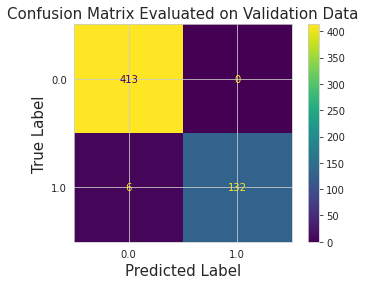

In [ ]:
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(model, X_val, y_val)  
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)
plt.title('Confusion Matrix Evaluated on Validation Data', fontsize=15)
plt.show()

When we look at our data we can see that:

- True Positive (TP) = 413; meaning 413 positive class data points were correctly classified by the model

- True Negative (TN) = 132; meaning 132 negative class data points were correctly classified by the model

- False Positive (FP) = 0; meaning none of the negative class data points were incorrectly classified as belonging to the positive class by the model

- False Negative (FN) = 6; meaning 6 positive class data points were incorrectly classified as belonging to the negative class by the model

## Hyperparameter Tuning


In the previous sections, we have trained the model and observed the results. In this section, we will do hyperparameter tuning to see if we can improve our model. To evaluate the model performance, we will utilize AUPRC (Area Under Precision-Recall Curve).

In [ ]:
from sklearn.metrics import auc, precision_recall_curve
import matplotlib.pyplot as plt

We will test our data using different n_estimator values. The default n_estimator value is 100. In addition to that, we will use 200 and 300 as our n_estimator values. 


In [ ]:
n_estimators = [100,200,300]

auc_values = []
for est in n_estimators:
  model = RandomForestClassifier(n_estimators = est)
  model.fit(X_train, y_train)
  
  preds = model.predict_proba(X_val)[:,1]
  precision, recall, thresholds = precision_recall_curve(y_val, preds)

  auc_sol = auc(recall, precision)
  auc_values.append(auc_sol)

n_est_best = max(auc_values)
ix = auc_values.index(n_est_best)
print("The best n estimator value is:", n_estimators[ix])

The best n estimator value is: 100


Since the default n-estimator value we took was 100 and the above code yielded 100 as the best estimator, we won't be retraining our model. We believe that it is optimal. 

#Conclusion

To summarize the steps of our project; under the Exploratory Data Analysis section, we analyzed our data using different variables and we examined their correlation relationships. Then, under the Statistical Analysis section, we conducted hypothesis testing to evaluate the plausibility of our hypotheses, which we formed based on our main dataset. Lastly, under the Machine Learning section, we utilized several machine learning alogirthms, of which we decided Random Forest Classifier was the most suitable classifier for our model, to make price predictions.  

Therefore, the aim of our project was to understand the price trends of Bitcoin using three datasets and extracting four extra features, and to develop a prediction model by exploring data and conducting statistical analysis.

Using our main dataset, which consisted of 2755 time-series based observations, we were able to predict the opening price of Bitcoin using numerical metrics such as close price, high price, low price, and volume and without using the external metrics date. 

The best performing classifier on our model was Random Forest Classifier with an accuracy of 98.5% and AUC of 97%. 

Looking at the plot confusion matrix, we were successful in classifying Bitcoin price as "high price" and "low price". Therefore, we can say that we achieved our goal of predicting Bitcoin future price and creating a simple recommendation system to decide whether to buy Bitcoin by classifying the Bitcoin open and close prices as "high price" and "low price". 

